# Exploratory Data Analysis Coursera Assignment Final Project
## Surya Prakash Karasala

### Abstract
Fine particulate matter (PM2.5) is an ambient air pollutant for which there is strong evidence that it is harmful to human health. In the United States, the Environmental Protection Agency (EPA) is tasked with setting national ambient air quality standards for fine PM and for tracking the emissions of this pollutant into the atmosphere. Approximatly every 3 years, the EPA releases its database on emissions of PM2.5. This database is known as the National Emissions Inventory (NEI). You can read more information about the NEI at the EPA National Emissions Inventory web site.

For each year and for each type of PM source, the NEI records how many tons of PM2.5 were emitted from that source over the course of the entire year. The data that you will use for this assignment are for 1999, 2002, 2005, and 2008.

Data The data for this assignment are available from the course web site as a single zip file:

Data for Peer Assessment [29Mb] The zip file contains two files:

PM2.5 Emissions Data (summarySCC_PM25.rds): This file contains a data frame with all of the PM2.5 emissions data for 1999, 2002, 2005, and 2008. For each year, the table contains number of tons of PM2.5 emitted from a specific type of source for the entire year. Here are the first few rows.

fips: A five-digit number (represented as a string) indicating the U.S. county
SCC: The name of the source as indicated by a digit string (see source code classification table)
Pollutant: A string indicating the pollutant
Emissions: Amount of PM2.5 emitted, in tons
type: The type of source (point, non-point, on-road, or non-road)
year: The year of emissions recorded
Source Classification Code Table (Source_Classification_Code.rds): This table provides a mapping from the SCC digit strings in the Emissions table to the actual name of the PM2.5 source. The sources are categorized in a few different ways from more general to more specific and you may choose to explore whatever categories you think are most useful. For example, source “10100101” is known as “Ext Comb /Electric Gen /Anthracite Coal /Pulverized Coal”.

### Goal

The overall goal of this assignment is to explore the National Emissions Inventory database and see what it say about fine particulate matter pollution in the United states over the 10-year period 1999-2008. You may use any R package you want to support your analysis.

### Querys

1. Have total emissions from PM2.5 decreased in the United States from 1999 to 2008? Using the base plotting system, make a plot showing the total PM2.5 emission from all sources for each of the years 1999, 2002, 2005, and 2008.
2. Have total emissions from PM2.5 decreased in the Baltimore City, Maryland (fips == “24510”) from 1999 to 2008? Use the base plotting system to make a plot answering this question.
3. Of the four types of sources indicated by the type (point, nonpoint, onroad, nonroad) variable, which of these four sources have seen decreases in emissions from 1999-2008 for Baltimore City? Which have seen increases in emissions from 1999-2008? Use the ggplot2 plotting system to make a plot answer this question.
4. Across the United States, how have emissions from coal combustion-related sources changed from 1999-2008?
5. How have emissions from motor vehicle sources changed from 1999-2008 in Baltimore City?
6. Compare emissions from motor vehicle sources in Baltimore City with emissions from motor vehicle sources in Los Angeles County, California (fips == “06037”). Which city has seen greater changes over time in motor vehicle emissions?


## Data

The data for this assignment are available from the course web site as a single zip file:

* [Data for Peer Assessment [29Mb]](https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2FNEI_data.zip)

The zip file contains two files:

PM2.5 Emissions Data (`summarySCC_PM25.rds`): This file contains a data frame with all of the PM2.5 emissions data for 1999, 2002, 2005, and 2008. For each year, the table contains number of tons of PM2.5 emitted from a specific type of source for the entire year. Here are the first few rows.
````
##     fips      SCC Pollutant Emissions  type year
## 4  09001 10100401  PM25-PRI    15.714 POINT 1999
## 8  09001 10100404  PM25-PRI   234.178 POINT 1999
## 12 09001 10100501  PM25-PRI     0.128 POINT 1999
## 16 09001 10200401  PM25-PRI     2.036 POINT 1999
## 20 09001 10200504  PM25-PRI     0.388 POINT 1999
## 24 09001 10200602  PM25-PRI     1.490 POINT 1999
````

* `fips`: A five-digit number (represented as a string) indicating the U.S. county
* `SCC`: The name of the source as indicated by a digit string (see source code classification table)
* `Pollutant`: A string indicating the pollutant
* `Emissions`: Amount of PM2.5 emitted, in tons
* `type`: The type of source (point, non-point, on-road, or non-road)
* `year`: The year of emissions recorded

Source Classification Code Table (`Source_Classification_Code.rds`): This table provides a mapping from the SCC digit strings int he Emissions table to the actual name of the PM2.5 source. The sources are categorized in a few different ways from more general to more specific and you may choose to explore whatever categories you think are most useful. For example, source “10100101” is known as “Ext Comb /Electric Gen /Anthracite Coal /Pulverized Coal”.

You can read each of the two files using the `readRDS()` function in R. For example, reading in each file can be done with the following code:


In [5]:
library(ggplot2)
library(RColorBrewer)
# Download and unzip the file:
#dir.create("./air_pollution")
urlzip <- "https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2FNEI_data.zip"
download.file(urlzip, destfile = "./air_pollution.zip" )
unzip("./air_pollution.zip", exdir = "./air_pollution" )


Source Classification Code Table (`Source_Classification_Code.rds`): This table provides a mapping from the SCC digit strings int he Emissions table to the actual name of the PM2.5 source. The sources are categorized in a few different ways from more general to more specific and you may choose to explore whatever categories you think are most useful. For example, source “10100101” is known as “Ext Comb /Electric Gen /Anthracite Coal /Pulverized Coal”.

You can read each of the two files using the `readRDS()` function in R.
## Load the data:

In [7]:
NEI <- readRDS("./air_pollution/summarySCC_PM25.rds")
SCC <- readRDS("./air_pollution/Source_Classification_Code.rds")

In [8]:
# Check NEI data
str(NEI)

'data.frame':	6497651 obs. of  6 variables:
 $ fips     : chr  "09001" "09001" "09001" "09001" ...
 $ SCC      : chr  "10100401" "10100404" "10100501" "10200401" ...
 $ Pollutant: chr  "PM25-PRI" "PM25-PRI" "PM25-PRI" "PM25-PRI" ...
 $ Emissions: num  15.714 234.178 0.128 2.036 0.388 ...
 $ type     : chr  "POINT" "POINT" "POINT" "POINT" ...
 $ year     : int  1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 ...


In [9]:
# Check SCC data
str(SCC)

'data.frame':	11717 obs. of  15 variables:
 $ SCC                : Factor w/ 11717 levels "10100101","10100102",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Data.Category      : Factor w/ 6 levels "Biogenic","Event",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ Short.Name         : Factor w/ 11238 levels "","2,4-D Salts and Esters Prod /Process Vents, 2,4-D Recovery: Filtration",..: 3283 3284 3293 3291 3290 3294 3295 3296 3292 3289 ...
 $ EI.Sector          : Factor w/ 59 levels "Agriculture - Crops & Livestock Dust",..: 18 18 18 18 18 18 18 18 18 18 ...
 $ Option.Group       : Factor w/ 25 levels "","C/I Kerosene",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Option.Set         : Factor w/ 18 levels "","A","B","B1A",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ SCC.Level.One      : Factor w/ 17 levels "Brick Kilns",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ SCC.Level.Two      : Factor w/ 146 levels "","Agricultural Chemicals Production",..: 32 32 32 32 32 32 32 32 32 32 ...
 $ SCC.Level.Three    : Factor w/ 1061 levels "","100% Biosolids (e.g., sewage s

## Querys
1. Have total emissions from PM2.5 decreased in the United States from 1999 to 2008? Using the base plotting system, make a plot showing the total PM2.5 emission from all sources for each of the years 1999, 2002, 2005, and 2008.

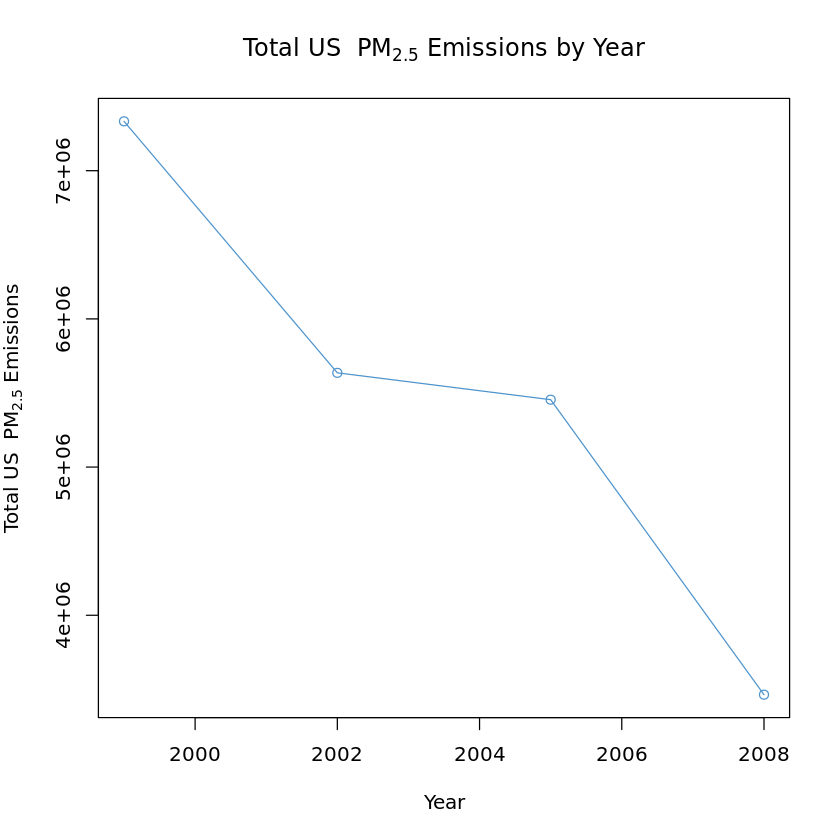

In [10]:
totalNEI <- aggregate(Emissions ~ year, NEI, sum)

plot(totalNEI$year, totalNEI$Emissions, type = "o", col = "steelblue3", main = expression("Total US "~ PM[2.5]~ "Emissions by Year"), ylab = expression("Total US "~   PM[2.5] ~ "Emissions"), xlab = "Year")

2. Have total emissions from PM2.5 decreased in the Baltimore City, Maryland (fips == “24510”) from 1999 to 2008? Use the base plotting system to make a plot answering this question.

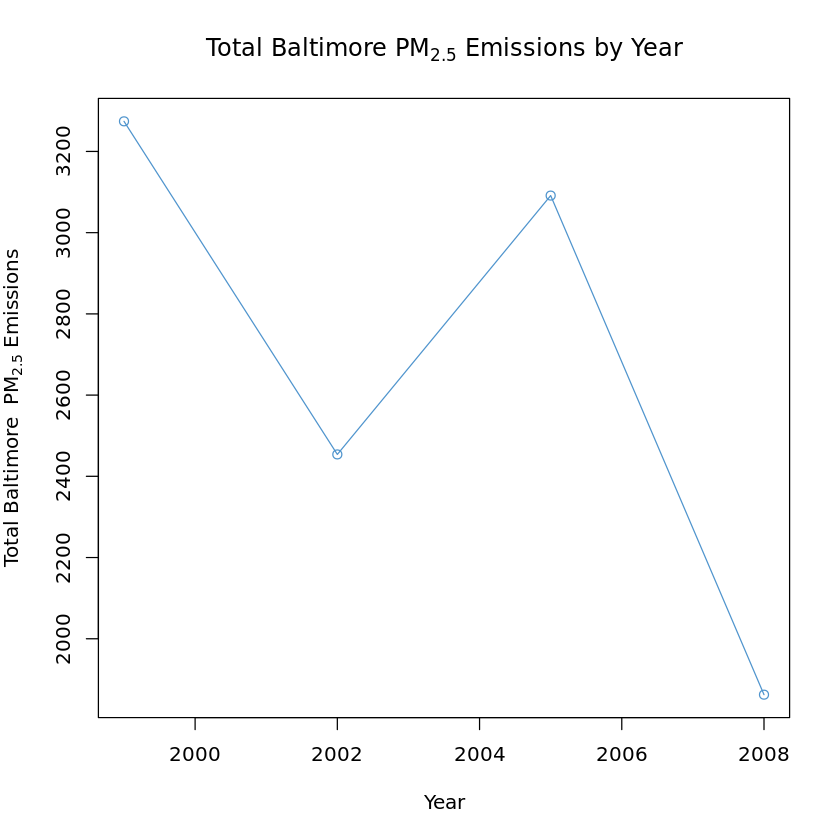

In [11]:
baltimore <- subset(NEI, NEI$fips == "24510")

totalBaltimore <- aggregate(Emissions ~ year, baltimore, sum)

plot(totalBaltimore$year, totalBaltimore$Emissions, type = "o", main = expression("Total Baltimore" ~ PM[2.5] ~ "Emissions by Year"), xlab = "Year", ylab = expression("Total Baltimore "~ PM[2.5] ~ "Emissions"), col = "steelblue3")

3. Of the four types of sources indicated by the type (point, nonpoint, onroad, nonroad) variable, which of these four sources have seen decreases in emissions from 1999-2008 for Baltimore City? Which have seen increases in emissions from 1999-2008? Use the ggplot2 plotting system to make a plot answer this question. library(ggplot2)

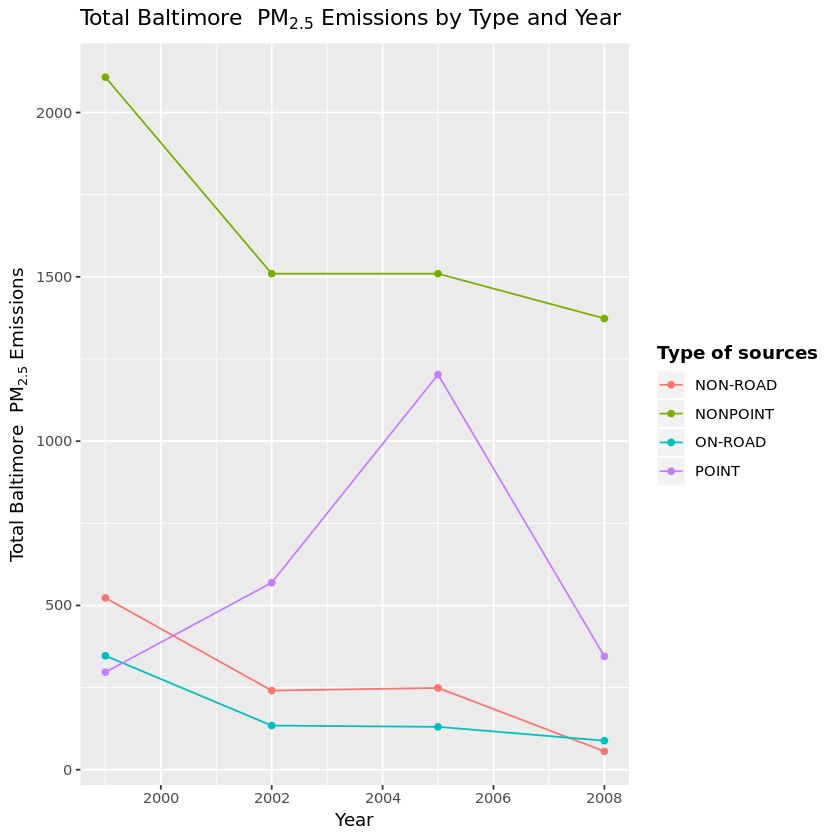

In [12]:
baltimore <- subset(NEI, NEI$fips == "24510")
baltimoreType <- aggregate(Emissions ~ year + type, baltimore, sum)

ggplot(baltimoreType, aes(year, Emissions, col = type)) +
      geom_line() +
      geom_point() +
      ggtitle(expression("Total Baltimore " ~ PM[2.5] ~ "Emissions by Type and Year")) +
      ylab(expression("Total Baltimore " ~ PM[2.5] ~ "Emissions")) +
      xlab("Year") +
      scale_colour_discrete(name = "Type of sources") +
      theme(legend.title = element_text(face = "bold"))

4. Across the United States, how have emissions from coal combustion-related sources changed from 1999-2008?

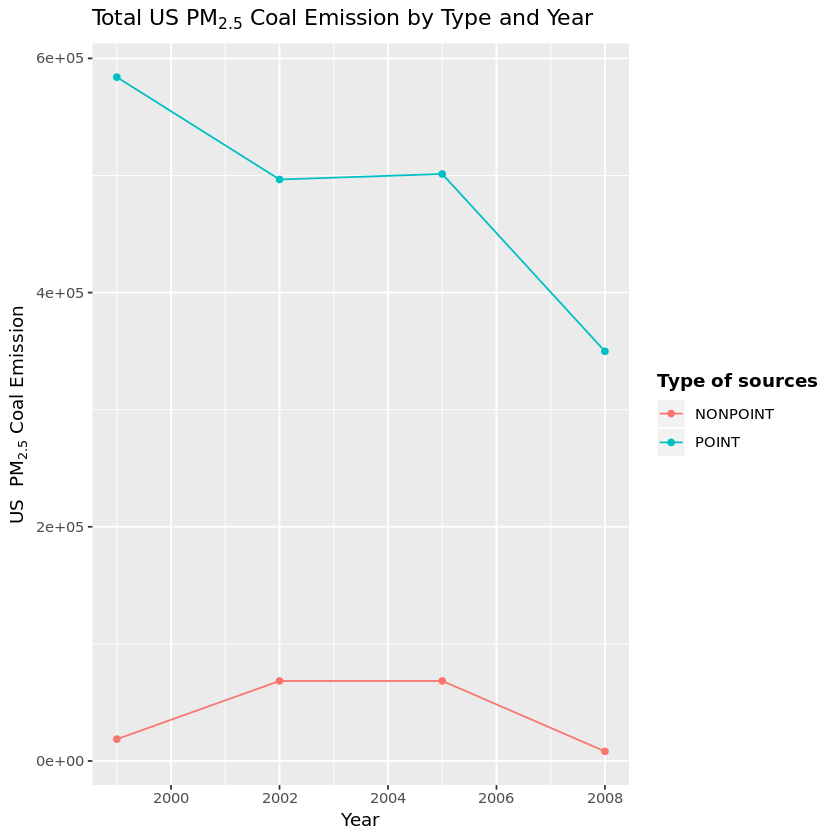

In [13]:
SCCcoal <- SCC[grepl("coal", SCC$Short.Name, ignore.case = T),]
NEIcoal <- NEI[NEI$SCC %in% SCCcoal$SCC,]
totalCoal <- aggregate(Emissions ~ year + type, NEIcoal, sum)

ggplot(totalCoal, aes(year, Emissions, col = type)) +
      geom_line() +
      geom_point() +
      ggtitle(expression("Total US" ~ PM[2.5] ~ "Coal Emission by Type and Year")) +
      xlab("Year") +
      ylab(expression("US " ~ PM[2.5] ~ "Coal Emission")) +
      scale_colour_discrete(name = "Type of sources") +
      theme(legend.title = element_text(face = "bold"))

5. How have emissions from motor vehicle sources changed from 1999-2008 in Baltimore City?

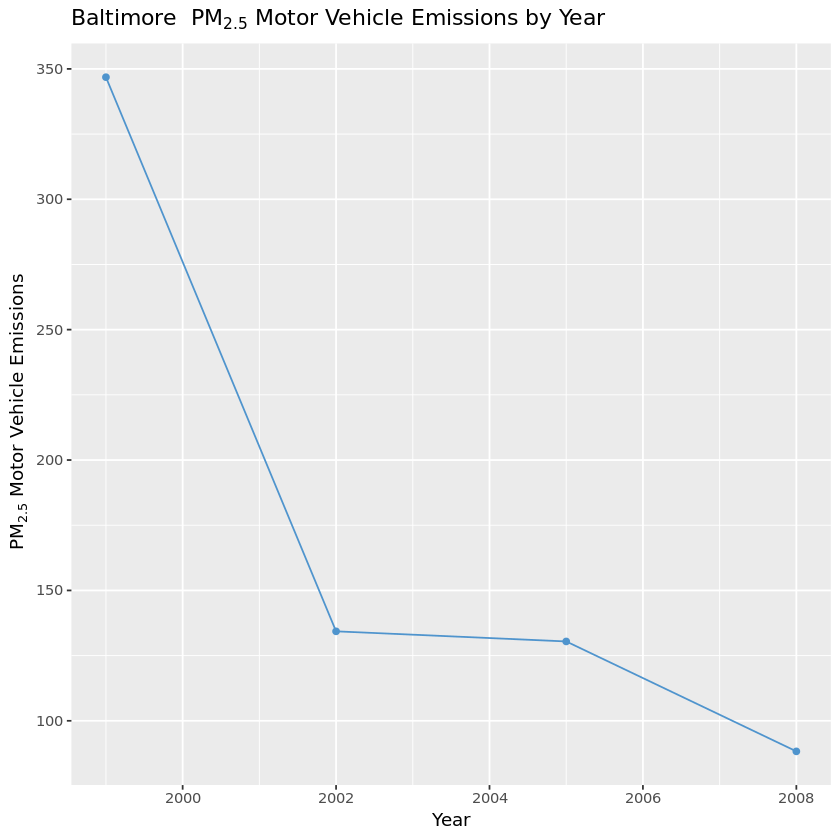

In [14]:
baltimoreMotor <- subset(NEI, NEI$fips == "24510" & NEI$type == "ON-ROAD")
baltimoreMotorAGG <- aggregate(Emissions ~ year, baltimoreMotor, sum)

ggplot(baltimoreMotorAGG, aes(year, Emissions)) +
      geom_line(col = "steelblue3") +
      geom_point(col = "steelblue3") +
      ggtitle(expression("Baltimore " ~ PM[2.5] ~ "Motor Vehicle Emissions by Year")) +
      xlab("Year") +
      ylab(expression(~PM[2.5]~ "Motor Vehicle Emissions"))

6. Compare emissions from motor vehicle sources in Baltimore City with emissions from motor vehicle sources in Los Angeles County, California (fips == “06037”). Which city has seen greater changes over time in motor vehicle emissions?

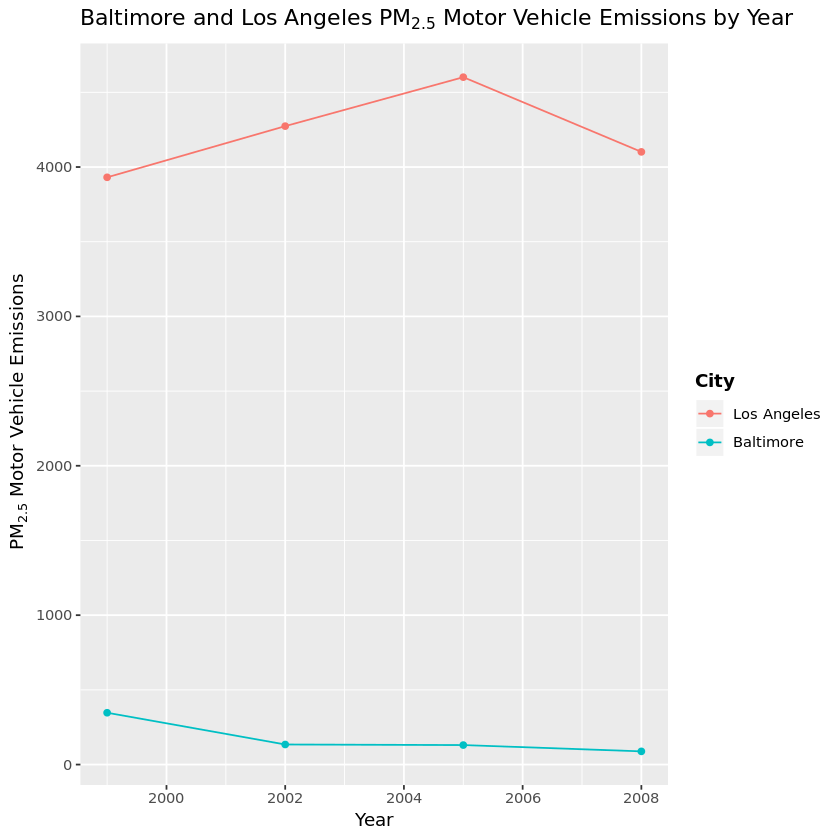

In [15]:
baltLosAngelesMotors <- subset(NEI, NEI$fips %in% c("24510","06037") & NEI$type == "ON-ROAD")
baltLosAngelesMotorsAGG <- aggregate(Emissions ~ year + fips, baltLosAngelesMotors, sum)

ggplot(baltLosAngelesMotorsAGG, aes(year, Emissions, col = fips)) +
      geom_line() +
      geom_point() +
      ggtitle(expression("Baltimore and Los Angeles" ~ PM[2.5] ~ "Motor Vehicle Emissions by Year")) +
      labs(x = "Year", y = expression(~PM[2.5]~ "Motor Vehicle Emissions") ) +
      scale_colour_discrete(name = "City", labels = c("Los Angeles", "Baltimore")) +
      theme(legend.title = element_text(face = "bold"))